<p style="color: orange; font-weight: bolder; font-size: 40px;">Importing Necessary Libraries</p>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

<p style="color: orange; font-weight: bolder; font-size: 40px;">Loading Dataset</p>

In [3]:
filepath=r"C:\Users\Nigatie\Documents\Files Extracted\Practice\pythone\Dataset_Files\Ecommerce Customers"
CustomerData=pd.read_csv(filepath)
CustomerData.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


<p style="color: orange; font-weight: bolder; font-size: 40px;">Explatory Data Analysis</p>

<p style="color: orangered; font-weight: bolder; font-size: 30px;">Exploring data</p>

In [4]:
#Checking the dimensions of dataset
CustomerData.shape

(500, 8)

In [5]:
#some information about the dataset
CustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
#Checking if there is any null values in our dataset
CustomerData.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [7]:
#Checking some statistical analysis it works only numeracal columns
CustomerData.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
#checking if there is duplicated rows in our dataset checking on axis-1
CustomerData.duplicated().sum()

np.int64(0)

In [9]:
#Identifying the string and numerical columns
numerical_cols=CustomerData.select_dtypes(include=['int64','float64']).columns
categorical_cols=CustomerData.select_dtypes(include=['object']).columns

<p style="color: orangered; font-weight: bolder; font-size: 30px;">Data Analaysis and Visualization</p>

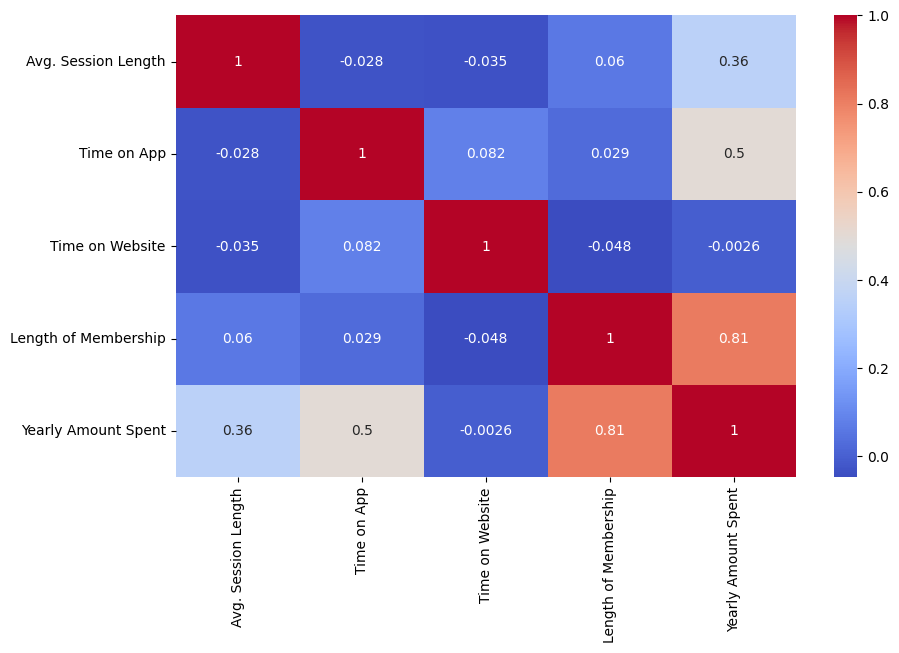

In [ ]:
#Checking the Correlation between different columns
CustomerData.corr()
plt.figure(figsize=(10,6))
sns.heatmap(CustomerData[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

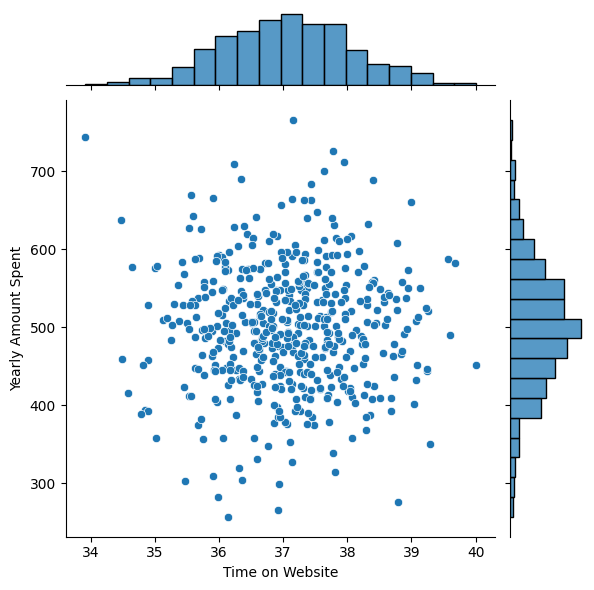

In [11]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=CustomerData)

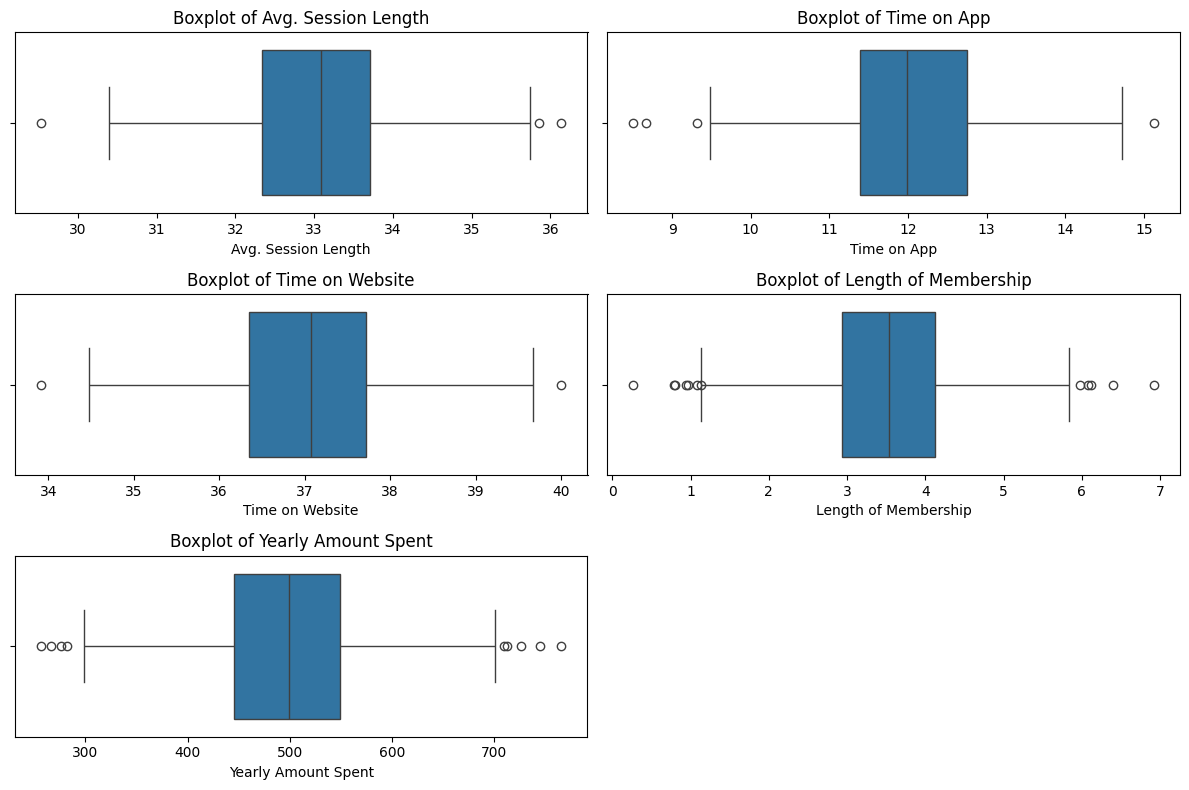

In [12]:
#checking outliers of the features using subplots and boxplots
plt.figure(figsize=(12,8))  #The hole figure size for all subplot
for i, col in enumerate(numerical_cols): #i start from zero and col is variable(column name at specific iteration)
    plt.subplot(3, 2, i+1)            #subplot need three parametrs row, column, index
    sns.boxplot(x=CustomerData[col])  #Boxplot needs one row data
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Avg. Session Length    -0.032175
Time on App            -0.089121
Length of Membership   -0.106608
Yearly Amount Spent     0.034790
dtype: float64


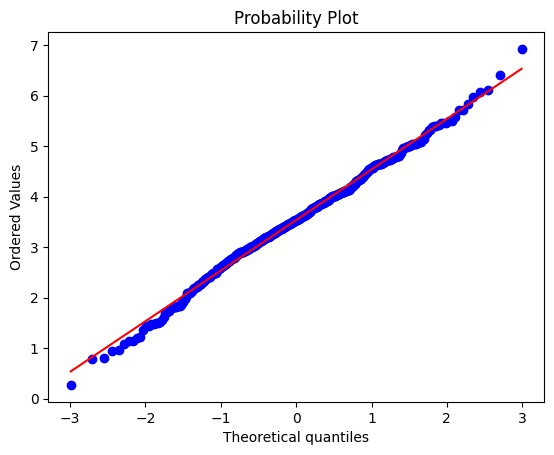

In [ ]:
#Checking the skewness of the data

print(CustomerData.skew())  #skewness of the data
stats.probplot(CustomerData["Length of Membership"], dist="norm", plot=plt)  #Q-Q plot- probplot accepts two main parameters data and distribution and plot
plt.show()

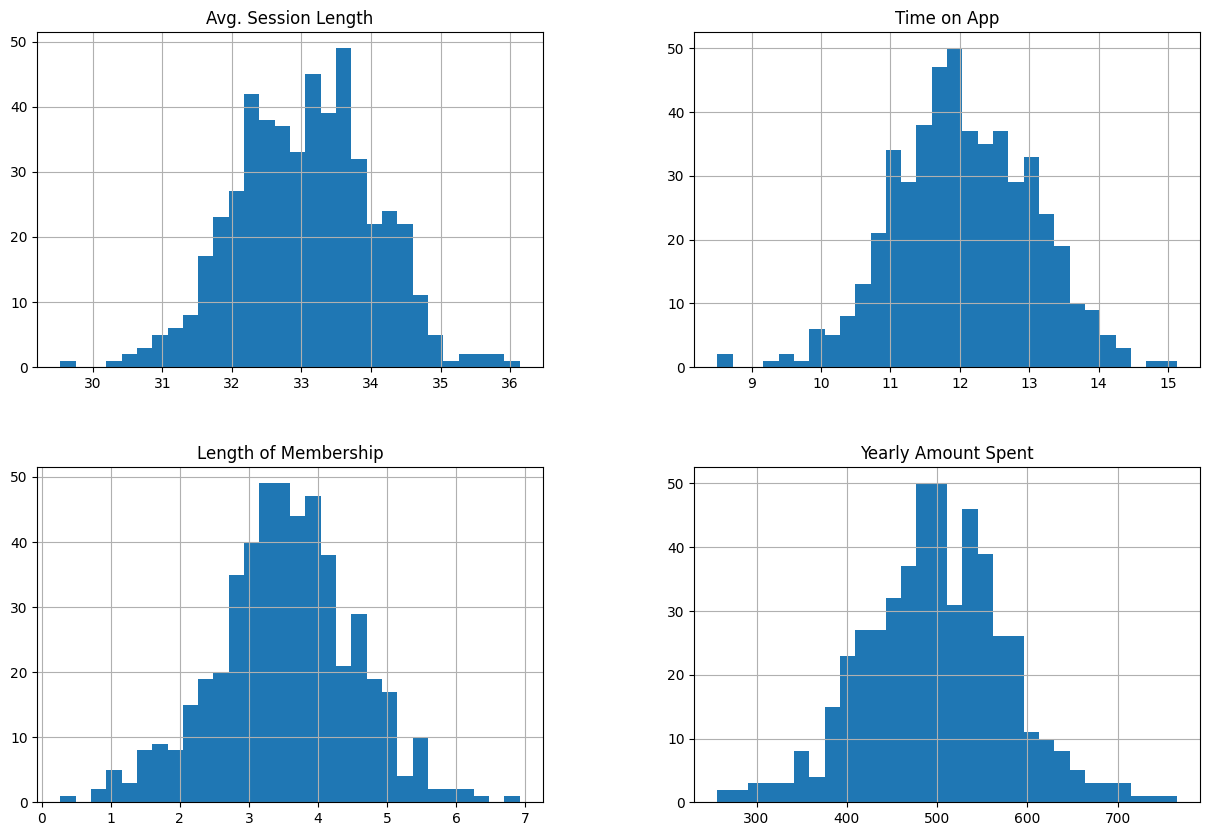

In [ ]:
#showing all Numrical columns of skewness
CustomerData[numerical_cols].hist(bins=30, figsize=(15,10))
plt.show()

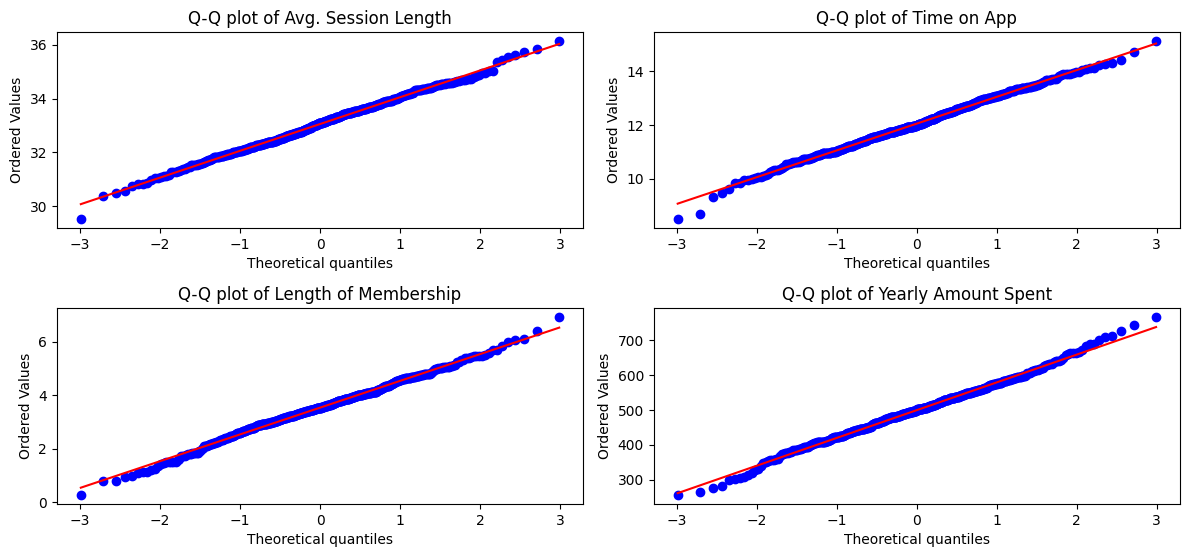

In [ ]:
#Q-Q plot for all numerical columns
plt.figure(figsize=(12,8))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i+1)
    stats.probplot(CustomerData[col], dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {col}')
plt.tight_layout()
plt.show()

<p style="color: orange; font-weight: bolder; font-size: 40px;">Feature Engineering</p>

<p style="color: orangered; font-weight: bolder; font-size: 30px;">Drop irrelevant columns</p>

In [14]:
# Drop irrelevant columns
CustomerData.drop(columns=["Email", "Avatar", "Time on Website"], axis=1, inplace=True)

In [21]:
numerical_cols=CustomerData.select_dtypes(include=['int64','float64']).columns

In [ ]:
CustomerData.drop(columns=["Address"], axis=1, inplace=True)   # Dropping Address column for simplicity(for now)

In [16]:
CustomerData.head()

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,4.082621,587.951054
1,31.926272,11.109461,2.664034,392.204933
2,33.000915,11.330278,4.104543,487.547505
3,34.305557,13.717514,3.120179,581.852344
4,33.330673,12.795189,4.446308,599.406092


<p style="color: orangered; font-weight: bolder; font-size: 30px;">Handle Outliers</p>

In [39]:
#using z-score method to handle outliers since it is normal distribution-no skewness
from scipy import stats

z_scores = np.abs(stats.zscore(CustomerData[numerical_cols]))
threshold = 2.5
CustomerData_no_outliers = CustomerData[(z_scores < threshold).all(axis=1)]

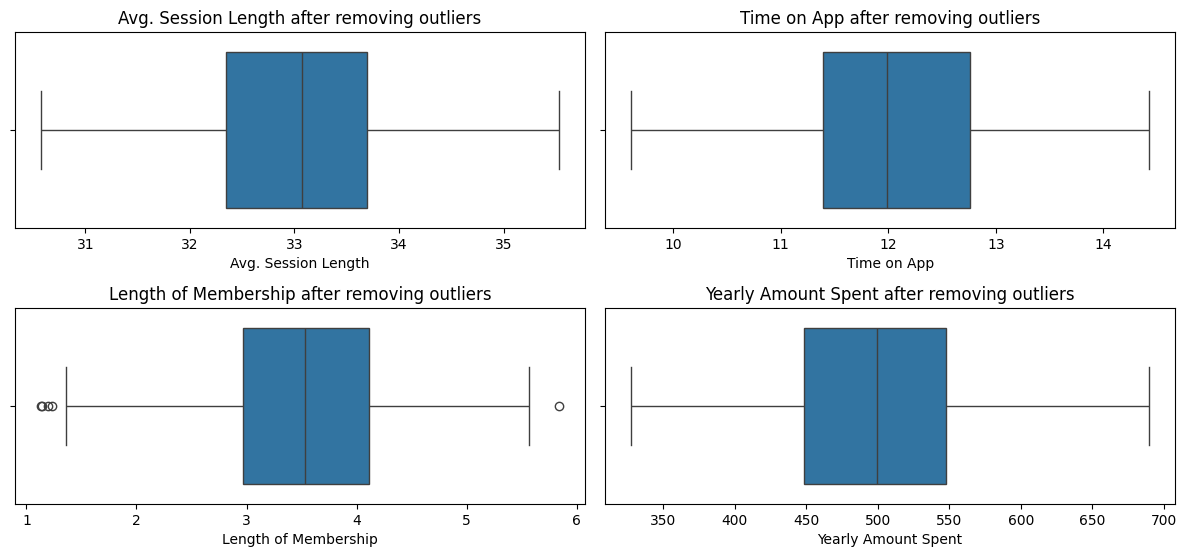

In [42]:
plt.figure(figsize=(12, 8))  #the hole size of the figure in plt module
for i, col in enumerate(numerical_cols):
    plt.subplot(3,2, i+1)
    sns.boxplot(x=CustomerData_no_outliers[col])
    plt.title(f"{col} after removing outliers")
plt.tight_layout()
plt.show()

<p style="color: orangered; font-weight: bolder; font-size: 30px;">Scaling</p>

In [45]:
#standardization are the best for scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_after_scaled=scaler.fit_transform(CustomerData_no_outliers[numerical_cols])
final_data=pd.DataFrame(data_after_scaled, columns=numerical_cols)
final_data.head()

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,1.576031,0.624397,0.607518,1.277804
1,-1.194328,-1.016353,-0.982271,-1.565031
2,-0.036354,-0.782031,0.632086,-0.180364
3,1.369454,1.751198,-0.471077,1.189232
4,0.318974,0.772467,1.015097,1.444166


<p style="color: orangered; font-weight: bolder; font-size: 30px;">Separating Feature and Target variable</p>

In [46]:
x=final_data.drop("Yearly Amount Spent", axis=1)
y=final_data["Yearly Amount Spent"]

<p style="color: orange; font-weight: bolder; font-size: 40px;">Train-Test Split</p>

In [48]:
#train-test split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=2)

<p style="color: orange; font-weight: bolder; font-size: 40px;">Train the Model</p>

In [57]:
#Create the model
my_linR_model=LinearRegression()

In [60]:
#Trian the model using level data(x_train and y_train)
my_linR_model=my_linR_model.fit(x_train, y_train)

<p style="color: orange; font-weight: bolder; font-size: 40px;">Prediction and Modek Evaluation</p>

In [76]:
#Prediction
x_train_prediction=my_linR_model.predict(x_train)
x_predicted=my_linR_model.predict(x_train)
y_predicted=my_linR_model.predict(x_test)
print(y_predicted)

[ 1.27583235  0.57448096  0.10093381  0.47808768  1.07613597 -1.0806934
  1.4344136  -0.41268115 -0.98777815 -1.13191786 -1.38286282 -1.14681907
  0.79213731 -1.50427003 -2.07938587 -1.09253704 -0.98837166 -0.60063345
  1.28519503  0.27882313 -0.38592495  0.80881125 -0.28169462  1.06736267
 -1.43435036  0.50838744  0.14246743 -0.39574133  0.69692902  0.61875618
 -1.51430579  1.11030231  0.65147699  1.28494904  1.72579329 -0.89572927
  0.40597698 -1.48670972 -0.03433152 -0.72317043  0.75823787 -1.26695825
  0.24070455 -0.07896683  1.32086029  0.11638518 -0.50733485  0.54913983
  1.8598495   0.41466312 -0.78851917 -0.22252603 -1.04027489  1.60821382
  0.27052847 -0.17904815 -1.51886432  0.46884925 -0.63511371  0.93478874
  0.65813227  0.82393288  0.17665371  1.0340898   0.63207028  0.13731322
 -0.76347598  0.80426119 -1.46709455  0.17528007  1.016439    0.91350323
 -0.70478921 -1.59844896 -0.18977543  0.35320757  0.89454627  0.18254735
  0.11519655  1.51215392 -1.27777761 -0.79776573  0.

In [77]:
#Model evaluation
mae1=mean_absolute_error(x_train_prediction, y_train)
print(mae1)
MAE=mean_absolute_error(y_predicted, y_test)
MSE=mean_squared_error(y_predicted, y_test)
R2=r2_score(y_predicted, y_test)
print(f"Mean Absolute Error:  {MAE}")
print(f"Mean Squared Errore: {MSE}")
print(f"R2 Score: {R2}")


0.11743166169266618
Mean Absolute Error:  0.10868643470267877
Mean Squared Errore: 0.019186136784728153
R2 Score: 0.9790103017438943
